<h2> Exploratory analysis of Rosenbock's CNN arhitecture </h2>
<p> This file contains exploratory analysis of a CNN arhitecture proposed by Adrian Reosenbock in his online project:</p>
<p>https://www.pyimagesearch.com/2019/02/18/breast-cancer-classification-with-keras-and-deep-learning/ </p>
<p> 
On a subset with 30,000 images this model achived at most 75% accuracy on validation set. 
</p>

In [2]:
import numpy as np
import h5py
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, SeparableConv2D, BatchNormalization, Dense, Dropout, MaxPooling2D, Activation
from tensorflow.keras.optimizers import Adam, Adagrad
import numpy as np
from sklearn.metrics import confusion_matrix

In [3]:
def load_dataset():

    f = h5py.File('Test_Set.h5', 'r')
    X_test = np.array(f['array'][:]) # your train set features
    f.close()
    
    f = h5py.File('Test_Label.h5', 'r')
    Y_test = np.array(f['array'][:]) # your train set features
    f.close()
    
    f = h5py.File('Train_Set.h5', 'r')
    X = np.array(f['array'][:]) # your train set features
    f.close()
    
    f = h5py.File('Train_Label.h5', 'r')
    Y = np.array(f['array'][:]) # your train set features
    f.close()
    
    return X, Y, X_test, Y_test

In [4]:
# --------- Load the data ------------

X, Y, X_test, Y_test = load_dataset()

In [9]:
# -------- Transform (30,000 x 1) matrix Y into (30,000 x 2) dimensional matrix ------------------
Y_classes = np.zeros((Y.shape[0], 2))
Y_classes[np.where(Y==0)[0],0] = 1 # 1 at possition Y_classes[n ,0] encodes a negative example 
Y_classes[np.where(Y==1)[0],1] = 1 # 1 at possition Y_classes[n ,1] encodes a positive example 

Y_classes_test = np.zeros((Y_test.shape[0], 2))
Y_classes_test[np.where(Y_test==0)[0],0] = 1
Y_classes_test[np.where(Y_test==1)[0],1] = 1

print('Total number of examples to train ', Y.shape[0])
print('Number of negative examples', len(np.where (Y == 1)[0]))

Total number of examples to train  30000
Number of negative examples 15000


<p style = "color:orange; font-size:24px; text-align:center;"> Define Rocenbock's model </p>

In [7]:
def Cancer_clasifier(input_shapes):
    
    X_input = Input(input_shapes)
    
    XX = SeparableConv2D(32, kernel_size = (3,3), strides=(1, 1), padding = 'same')(X_input)
    XX = Activation('relu')(XX)
    XX = BatchNormalization()(XX)
    XX = MaxPooling2D(2,2)(XX)
    XX = Dropout(0.25)(XX)

    XX = SeparableConv2D(64, kernel_size = (3,3), strides=(1, 1), padding = 'same')(XX)
    XX = Activation('relu')(XX)
    XX = BatchNormalization()(XX)
    XX = SeparableConv2D(64, kernel_size = (3,3), strides=(1, 1), padding = 'same')(XX)
    XX = Activation('relu')(XX)
    XX = BatchNormalization()(XX)  
    XX = MaxPooling2D(2,2)(XX)
    XX = Dropout(0.25)(XX)
    
    XX = SeparableConv2D(128, kernel_size = (3,3), strides=(1, 1), padding = 'same')(XX)
    XX = Activation('relu')(XX)
    XX = BatchNormalization()(XX)
    XX = SeparableConv2D(128, kernel_size = (3,3), strides=(1, 1), padding = 'same')(XX)
    XX = Activation('relu')(XX)
    XX = BatchNormalization()(XX)
    XX = SeparableConv2D(128, kernel_size = (3,3), strides=(1, 1), padding = 'same')(XX)
    XX = Activation('relu')(XX)
    XX = BatchNormalization()(XX)
    XX = MaxPooling2D(2,2)(XX)
    XX = Dropout(0.25)(XX)

    
    # --- Output Layer
    XX = Flatten()(XX)
    
    XX = Dense(256, activation = 'relu')(XX)
    XX = BatchNormalization()(XX)
    XX = Dropout(0.5)(XX)

    
    XX = Dense(2, activation='softmax')(XX)
    
    model = Model(inputs = X_input, outputs = XX, name='Cancer_clasifier')
              
    return model

<p style = "color:orange; font-size:24px; text-align:center;"> Train Rosenbock's model </p>

In [10]:
my_cancer_model = Cancer_clasifier(X.shape[1:])
my_cancer_model.summary()

optimizing_function = Adagrad(learning_rate = 1e-2)

my_cancer_model.compile(optimizer = optimizing_function, loss='binary_crossentropy', metrics=['accuracy'])

history = my_cancer_model.fit(x = X, y = Y_classes, validation_data=(X_test,Y_classes_test), epochs = 40, batch_size = 32)

Model: "Cancer_clasifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
separable_conv2d_7 (Separabl (None, 50, 50, 32)        155       
_________________________________________________________________
activation_7 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
separable_conv2d_8 (Separabl (None, 25, 25, 64)   

938/938 [==============================] - 469s 500ms/step - loss: 0.2496 - accuracy: 0.8993 - val_loss: 0.9368 - val_accuracy: 0.7498
Epoch 28/40
938/938 [==============================] - 387s 413ms/step - loss: 0.2495 - accuracy: 0.8979 - val_loss: 1.2628 - val_accuracy: 0.7292
Epoch 29/40
938/938 [==============================] - 386s 411ms/step - loss: 0.2458 - accuracy: 0.9006 - val_loss: 0.9799 - val_accuracy: 0.7279
Epoch 30/40
938/938 [==============================] - 379s 404ms/step - loss: 0.2435 - accuracy: 0.9007 - val_loss: 1.3427 - val_accuracy: 0.7209
Epoch 31/40
938/938 [==============================] - 373s 398ms/step - loss: 0.2425 - accuracy: 0.9019 - val_loss: 1.1401 - val_accuracy: 0.7355
Epoch 32/40
938/938 [==============================] - 380s 405ms/step - loss: 0.2429 - accuracy: 0.9011 - val_loss: 1.0538 - val_accuracy: 0.7408
Epoch 33/40
938/938 [==============================] - 390s 416ms/step - loss: 0.2420 - accuracy: 0.9005 - val_loss: 1.3827 - val_

<p style = "color:orange; font-size:24px; text-align:center;"> Plot the loss </p>

Text(0.5, 1.0, 'Batch = 32, LR_Adagrad = 0.01, Rosebrock Model trained on 15,000 negative and 15,000 positive examples')

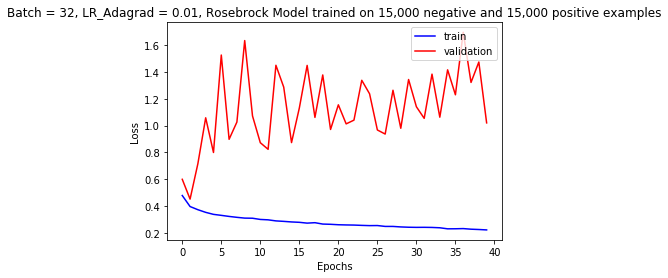

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.legend(['train', 'validation'], loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Batch = 32, LR_Adagrad = 0.01, Rosebrock Model trained on 15,000 negative and 15,000 positive examples')

# -- If you want to save the image uncomment this line
#plt.savefig('Model1_Exploratory.png')

As we see from the plot, validation error fluctuates and does not converge.